## Bibliotecas e módulos

In [1]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.datasets import make_blobs

from sklearn.cluster import AgglomerativeClustering

from sklearn import mixture

#from matplotlib import rcParams
#rcParams['text.usetex'] = True
#rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'

## Simulação e visualização dos dados

[(-7.517526577754113, 5.101942181379384),
 (-11.825078554442136, 5.546385296559158)]

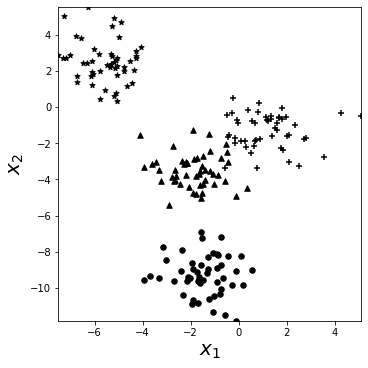

In [2]:
np.random.seed(2)
agrupamentos = 4
x, y = make_blobs(n_features=2, centers=agrupamentos, n_samples=200)

marr = ['o','+','^','*']
vecMar = []
for i in y: vecMar.append(marr[i])
    
FS = (5,5) #Tamanho da figura a ser gerada
fig = plt.figure(constrained_layout=True,figsize=FS)
spec = gridspec.GridSpec(ncols=1, nrows=1, figure=fig)

#Subgráficos...
ax = fig.add_subplot(spec[0, 0])
for i in range(agrupamentos):
    pos =  np.where(y == i)
    ax.scatter(x[pos, 0], x[pos, 1], marker=marr[i], c='k', s=30)

ax.set_xlabel('$x_1$', fontsize=20)
ax.set_ylabel('$x_2$', fontsize=20)
ax.set(xlim=(np.min(x[:,0]), np.max(x[:,0])), ylim=(np.min(x[:,1]), np.max(x[:,1])))

## Construção do modelo de mistura de gaussianas

In [3]:
#Número de agrupamentos
n_clusters = 4

#Instanciação e modelagem
gmm = mixture.GaussianMixture(n_components=n_clusters)
gmm.fit(x)

GaussianMixture(n_components=4)

## Reinterpretação do modelo de mistura na forma de agrupamentos

In [4]:
yEst = []
for i in range(x.shape[0]):
    yEst.append( np.argmax( gmm.predict_proba( [x[i,:]] ) ) )
    
yEst = np.array(yEst)

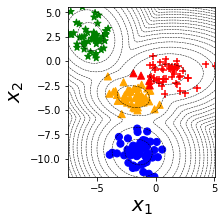

In [7]:
path_save = 'agrupGMM.png'

coll = ['red','blue','green','orange']
    
FS = (3,3) #Tamanho da figura a ser gerada
fig = plt.figure(constrained_layout=True,figsize=FS)
spec = gridspec.GridSpec(ncols=1, nrows=1, figure=fig)

#Subgráfico...
ax = fig.add_subplot(spec[0,0])
for i in range(n_clusters):
    pos = np.where( y == i )
    vecCol = [];
    for j in pos[0]: vecCol.append(coll[ yEst[j] ])
    ax.scatter(x[pos, 0], x[pos, 1], marker=marr[i], c=vecCol, s=50)
    
ax.set_xlabel('$x_1$', fontsize=20)
ax.set_ylabel('$x_2$', fontsize=20)
ax.set(xlim=(np.min(x[:,0]), np.max(x[:,0])), ylim=(np.min(x[:,1]), np.max(x[:,1])))


#Contournos/probabilidades... (item adicional)
N = 200
X,Y = np.meshgrid( np.linspace(np.min(x[:,0]), np.max(x[:,0]), N) , np.linspace(np.min(x[:,1]), np.max(x[:,1]),N) )
Z = gmm.score_samples( np.array([X.ravel(), Y.ravel()]).T )
CS = plt.contour(X, Y,  Z.reshape(X.shape), levels=20, linewidths=0.5, colors='k')

plt.savefig(path_save,dpi=300)
plt.show()